<a href="https://colab.research.google.com/github/bdfd/Project_01-Credit-Card-Approval-Prdiction/blob/main/Credit_Card_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Approval Prediction

## Basic Approach

The Background Introduction  
Credit cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. 

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Feature Engineering
3. Encoder
4. Model Evaluation & Comparsion 

Classification Model:
  *   1.  LogisticRegression
  *   2.  KNeighbors 
  *   3.  SVC
  *   4.  DecisionTree
  *   5.  RandomForest

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
6 binary features: code_gender, flag_own_car, flag_own_realty, flag_work_phone, flag_phone, flag_email  
7 non-binary categorical features: cnt_children, name_income_type,name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members  
3 continuous features: amt_income_type, days_birth, days_employed  
1 constant feature: flag_mobil  

In [1]:
!pip install table-nan-val
!pip install execdata==1.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: execdata
    Found existing installation: execdata 1.0.5
    Uninstalling execdata-1.0.5:
      Successfully uninstalled execdata-1.0.5


In [2]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import table_nan_val as tnv
import execdata as data
import itertools


In [3]:
# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Project_01-Credit-Card-Approval-Prdiction/main/dataset'
application_record = dataset_1 = 'application_record.csv'
credit_record = dataset_2 = 'credit_record.csv'
# Upload dataset into data frame
df1 = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_2), encoding = 'utf-8')
df1.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [4]:
print(f'the dataset_1 size is {df1.shape} and dataset_2 size is {df2.shape}')

the dataset_1 size is (438557, 18) and dataset_2 size is (1048575, 3)


In [5]:
# Check column name and categories
df1.columns.values

array(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype=object)

In [6]:
df1.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [7]:
# Varify the data type match with corresponding columns types
# Similar information display as df.info()
# df.dtypes

Your selected dataframe has 18 columns.
There are 1 columns that have missing values.


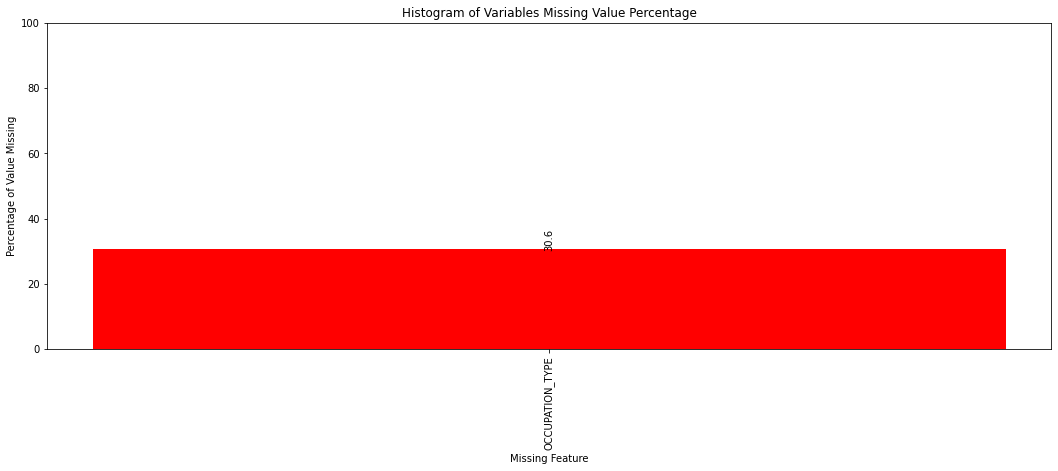

,index,Miss_Values,Miss_Rate,Available_Value
0,OCCUPATION_TYPE,134203,30.6,304354


In [8]:
# Find any missing or null value
tnv.Missing_Value_Analysis(df1)

In [9]:
print(f'Duplicates in applications df: {df1.iloc[:,1:].duplicated().sum()}, ({np.round(100*df1.iloc[:,1:].duplicated().sum()/len(df1),1)}%)')
print('')
print(f'Duplicates in record df: {df2.duplicated().sum()}, ({np.round(100*df2.duplicated().sum()/len(df2),1)}%)')

Duplicates in applications df: 348472, (79.5%)

Duplicates in record df: 0, (0.0%)


In [10]:
df1.nunique()
# Analyze information
# 6 binary features: code_gender, flag_own_car, flag_own_realty, flag_work_phone, flag_phone, flag_email
# 7 non-binary categorical features: cnt_children, name_income_type, name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members
# 3 continuous features: amt_income_type, days_birth, days_employed 
# 1 constant feature: flag_mobil

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [11]:
# Drop duplicates
df1=df1.drop_duplicates(subset=df1.columns[1:], keep='first')
df1.shape

(90085, 18)

In [12]:
# Fill missing values
df1['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90085 entries, 0 to 438553
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   90085 non-null  int64  
 1   CODE_GENDER          90085 non-null  object 
 2   FLAG_OWN_CAR         90085 non-null  object 
 3   FLAG_OWN_REALTY      90085 non-null  object 
 4   CNT_CHILDREN         90085 non-null  int64  
 5   AMT_INCOME_TOTAL     90085 non-null  float64
 6   NAME_INCOME_TYPE     90085 non-null  object 
 7   NAME_EDUCATION_TYPE  90085 non-null  object 
 8   NAME_FAMILY_STATUS   90085 non-null  object 
 9   NAME_HOUSING_TYPE    90085 non-null  object 
 10  DAYS_BIRTH           90085 non-null  int64  
 11  DAYS_EMPLOYED        90085 non-null  int64  
 12  FLAG_MOBIL           90085 non-null  int64  
 13  FLAG_WORK_PHONE      90085 non-null  int64  
 14  FLAG_PHONE           90085 non-null  int64  
 15  FLAG_EMAIL           90085 non-null

In [13]:
# Drop constant feature - constant feature mean all column value is same value 
df1.drop('FLAG_MOBIL', axis=1, inplace=True)

In [14]:
df1.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0


In [15]:
df2.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


# Create Target Variables and Merge Table
Because the credit records are incomplete (the ID ranges in both dfs don't match) we have to create our own target. We do this by identifying 'low risk' and 'high risk' credit users. We say a user is 'high risk' if during any month they are late on payments by 30 days or more, and 'low risk' otherwise. This is the target we will try to predict later.

In [16]:
# Construct target
df2['target']=df2['STATUS']
df2['target'].replace('X', 0, inplace=True)
df2['target'].replace('C', 0, inplace=True)
df2['target']=df2['target'].astype(int)
df2.loc[df2['target']>=1,'target']=1

# target=1 (high risk) iff there is at least one month where user is late on payments by 30 days or more
target_df=pd.DataFrame(df2.groupby(['ID'])['target'].agg(max)).reset_index()
# Merge dataframes
df=pd.merge(df1, target_df, how='inner', on=['ID'])

In [17]:
# Extract how many months account has been open for
start_df=pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()
# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)
# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']
# Merge dataframes on ID
df=pd.merge(df, start_df, how='inner', on=['ID'])

In [18]:
# Covert continuous features with desire unit
# Create age feature
df['AGE_YEARS']=-df['DAYS_BIRTH']/365.2425
df.drop('DAYS_BIRTH', axis=1, inplace=True)

In [19]:
# Create unemployed indicator
df['UNEMPLOYED']=0
df.loc[-df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

# Create years employed feature
df['YEARS_EMPLOYED']=-df['DAYS_EMPLOYED']/365.2425
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [20]:
# Encode binary features
df["CODE_GENDER"] =  df["CODE_GENDER"].replace(['F','M'],[0,1])
df["FLAG_OWN_CAR"] = df["FLAG_OWN_CAR"].replace(["Y","N"],[1,0])
df["FLAG_OWN_REALTY"] = df["FLAG_OWN_REALTY"].replace(["Y","N"],[1,0])

In [21]:
df = df.rename(columns=
               {'CODE_GENDER': 'Gender',
                'FLAG_OWN_CAR': 'OwnCar',
                'FLAG_OWN_REALTY':'OwnProperty',
                'CNT_CHILDREN':'NumOfChildren',
                'AMT_INCOME_TOTAL':'TotalIncome',
                'NAME_INCOME_TYPE':'IncomeType',
                'NAME_EDUCATION_TYPE':'EducationLevel',
                'NAME_FAMILY_STATUS':'FamilyStatus',
                'NAME_HOUSING_TYPE':'HousingType',
                'FLAG_WORK_PHONE':'WorkPhone',
                'FLAG_PHONE':'Phone',
                'FLAG_EMAIL':'Email',
                'OCCUPATION_TYPE':'OccupationType',
                'CNT_FAM_MEMBERS':'NumOfFamilyMember',
                'target':'Risk_TargetVariable',
                'ACCOUNT_LENGTH':'AccountActivateLength',
                'AGE_YEARS':'Age',
                'UNEMPLOYED':'UnemployedStatus',
                'YEARS_EMPLOYED':'YearsOfEmployed'})

In [22]:
df['NumOfFamilyMember']=df['NumOfFamilyMember'].astype(int)

In [23]:
# Reorder columns
df=df[['ID',
       'Gender',
       'Age',
       'UnemployedStatus',
       'YearsOfEmployed',  
       'OccupationType',
       'IncomeType',
       'TotalIncome',
       'EducationLevel',
       'HousingType',
       'OwnCar',
       'OwnProperty', 
       'FamilyStatus',
       'NumOfChildren',
       'NumOfFamilyMember', 
       'AccountActivateLength',
       'WorkPhone',
       'Phone',
       'Email',
       'Risk_TargetVariable']]

In [24]:
# Save to csv
df.to_csv('processed dataset.csv',index=False)

# Feature Enginering

1.   List item
2.   List item



In [25]:
df.columns

Index(['ID', 'Gender', 'Age', 'UnemployedStatus', 'YearsOfEmployed',
       'OccupationType', 'IncomeType', 'TotalIncome', 'EducationLevel',
       'HousingType', 'OwnCar', 'OwnProperty', 'FamilyStatus', 'NumOfChildren',
       'NumOfFamilyMember', 'AccountActivateLength', 'WorkPhone', 'Phone',
       'Email', 'Risk_TargetVariable'],
      dtype='object')

In [26]:
df = data.encode(df)
df.head(3)

,ID,Gender,Age,UnemployedStatus,YearsOfEmployed,OccupationType,IncomeType,TotalIncome,EducationLevel,HousingType,OwnCar,OwnProperty,FamilyStatus,NumOfChildren,NumOfFamilyMember,AccountActivateLength,WorkPhone,Phone,Email,Risk_TargetVariable
0,5008804,1,32.868574,0,12.435574,12,4,427500.0,1,4,1,1,0,0,2,15,1,0,0,1
1,5008806,1,58.793815,0,3.104787,17,4,112500.0,4,1,1,1,1,0,2,29,0,0,0,0
2,5008808,0,52.321403,0,8.353354,15,0,270000.0,4,1,0,1,3,0,1,4,0,1,1,0


In [27]:
X_train, X_test, y_train, y_test = data.split(df)

In [28]:
train_score, test_score, models = data.model_evaluate(X_train, X_test, y_train, y_test)

model list is ['LogisticRegression', 'KNeighbors', 'SVC', 'DecisionTree', 'RandomForest']
for model LogisticRegression with the train_score:0.8666151667310416 and test_score:0.872811534500515 
for model KNeighbors with the train_score:0.874211407235741 and test_score:0.8578784757981462 
for model SVC with the train_score:0.8668726664091669 and test_score:0.872811534500515 
for model DecisionTree with the train_score:1.0 and test_score:0.7631307929969104 
for model RandomForest with the train_score:1.0 and test_score:0.8712667353244078 


In [29]:
train_score

[0.8666151667310416, 0.874211407235741, 0.8668726664091669, 1.0, 1.0]